## Manually : 

Note : If the entire row is NULL or NA then don't bother filling in the value bettr to discard the entire row instead
- [ ] Remove the "impact" option by classifying them into other `issues`
- [ ] Combine some of the causes into one `issues`
- [ ] Can we fill in the values for `impact_in_process`? 
- [x] Call to action will be the issue solved so no need of translating anything


## Convention : 
1. Everything is in lower case
2. For boolean values it is always True or False

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 2050)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import re
%store -r selected_1

## Helper Fucntions

In [2]:
def split_dates(df, column_name) -> pd.DataFrame:
    if type(df[column_name][0]) == str:
        df[[str(column_name)+'_year', 
            str(column_name)+'_month',
            str(column_name)+'_day']] = df[column_name].str.split("-", expand=True)
    
    if type(df[column_name][0]) == pd._libs.tslibs.timestamps.Timestamp:
        df.loc[:, str(column_name)+'_year'] = df.loc[:, column_name].dt.year
        df.loc[:, str(column_name)+'_month'] = df.loc[:, column_name].dt.month
        df.loc[:, str(column_name)+'_day'] = df.loc[:, column_name].dt.day
    return df

def check_designation(word, titles):
    for title in titles:
        if title in word:
            return title
    return 'NA'

def check_cs(word, titles):
    for title in titles:
        if title in word:
            return title
        else : 
            return word
        
def combined_title(text):
    if ',' in text:
        title =''
        split_multi_word = text.split(',')
        for i, word in enumerate(split_multi_word):
            if i == 0:
                title += combined_title(word)
            else:
                title += word[0] + combined_title(word[1:])
    else:
        split_text = text.split(' ')
        title = ''.join(word[0] for word in split_text)
    return title   

In [3]:
unclean_data = pd.read_excel('Data_Video_Volunteers (translated).xlsx', sheet_name=0)
unclean_data.reset_index(drop=True, inplace=True)
unclean_data.head()

,id,id,state_id,state_name,district,cc_id,cc_name,mentor,story_pitch_date,description,village_name,block_name,panchayat_name,approval,reason_to_hold,cc_creative_idea_for_issue_video,shoot_plan,topic_identification_reason,other_topic_identification_reason,issues,issue_2,themes,government_program_details,projects,problem_identification_by_cc,impact_problem_reporting,social_movement_work,ngo_collaboration,social_movement_involvement_details,impact_possible,agents_of_change,impact_steps_followed_at_local_level,other_impact_steps_followed_at_local_level,impact_needs_office_intervention,kinds_of_office_support_needed,office_support_in_progress,office_person_in_charge,cc_impact_work_intention,cc_no_impact_work_intention_reason,impact_in_process,duration_of_problem,underlying_reason_of_issue,other_underlying_reason_of_issue,primary_affected_groups,level_of_spread,other_level_of_spread,no_of_individuals_affected,affected_area_type,actors_who_need_to_take_action,impact_plan,call_to_action,call_to_action_details,target_official,steps_taken_towards_impact,who_is_persuing_the_impact,issue_footage_received_from_cc_date,issue_edited_by,issue_edit_cleaned_by,flagged_issue,facebook_url,facebook_publish_date,youtube_url,youtube_publish_date,issue_video_youtube_subtitle,website_url,website_publish_date,impact_raised_awareness,impact_raised_awareness_other_details,impact_community_meetings_done,impact_community_meetings_number,impact_community_meetings_attendance_number,escalate_problem_to_govt_officials,impact_govt_application_filing,impact_called_govt_official,impact_govt_official_no_of_calls,impact_govt_official_visit,impact_govt_official_no_of_visits,impact_public_grievance_mechanism_use,impact_rti_application_filing,impact_contact_lawyer,impact_contact_politician,impact_contact_vv_staff,impact_contact_news_media,impact_publicize_on_social_media,impact_affected_community_member_support,impact_other_community_member_support,impact_other_community_member_support_details,impact_other_community_member_support_details_other,impact_govt_official_support,impact_govt_official_support_details,impact_other_support,screening_done,screened_to,screened_to_total_number,screening_sharing,where_was_screening_shared,screening_shared_to,screening_shared_to_total_number,screening_shared_to_total_private_sharing,is_impact,impact_uid,impact_cc_verification_call,concerns_about_cc_achieving_impact,impact_corroboration_details,impact_corroboration_call,impact_achieved_description,impact_other_direct_role,impact_help_from_other_sources,other_uids_associate_with_impact,impact_date,people_involved,people_who_took_action,people_impacted,villages_impacted,sharing_video_helped_in_impact,how_did_sharing_video_helped,impact_and_advocacy_team_intervention,impact_due_to_impact_and_advocacy_team,details_of_impact,impact_footage_received_from_cc_date,impact_edited_by,impact_edit_cleaned_by,important_impact,impact_facebook_url,impact_facebook_publish_date,impact_youtube_url,impact_youtube_publish_date,impact_video_youtube_subtitle,impact_website_url,impact_website_publish_date,created_by,created_at,updated_at
0,2465,JH_5257,16,Jharkhand,Palamu,438,Bhaskar Raj,Shikha Paharin,2021-08-10,Before the primary health center in Satbarwa b...,Satbarwa,Satbarwa,Satbarwa,Approved,NaN,I will go to that hospital and make a video a...,"What is the problem, since when, whose proble...",They toured the block to find out what's goin...,NA,Anti Poverty Programs,health,"A Material problem (eg delivery of a service,...",NA,Health Hospital,Yes,Yes,no,no,NA,Yes,Government official,"Making a social media post, explaining the pr...",NA,Yes,There should be a series of videos on this to...,NaN,NaN,Yes,NaN,no,5 years or more,Denial of service delivery or entitlement pro...,NA,No particular groups is affected -- the probl...,blocks,NA,70000.0,Rural: a village or Gram Panchayat issue,Department bureaucrat-district level,Jharkhand will sweet the Chief Minister and Jh...,Yes,Health center should be opened,now

In [4]:
# Original column names had a space in the front
unclean_data.columns = unclean_data.columns.str.strip()
unclean_data = unclean_data.fillna('NA')

In [5]:
unclean_data.columns

Index(['id', 'id', 'state_id', 'state_name', 'district', 'cc_id', 'cc_name', 'mentor', 'story_pitch_date', 'description',
       ...
       'impact_facebook_url', 'impact_facebook_publish_date', 'impact_youtube_url', 'impact_youtube_publish_date', 'impact_video_youtube_subtitle', 'impact_website_url', 'impact_website_publish_date', 'created_by', 'created_at', 'updated_at'], dtype='object', length=133)

In [6]:
#  Cleaned datafrane will be the combinatino of all the batches

## Cleaning Status - 1
- [x] 'cc_name', 
- [x] 'mentor', 
- [ ] 'description',  
- [x] 'issues',
- [x] 'youtube_publish_date',
- [x] 'updated_at', 
- [x] 'district', 
- [x] 'impact_possible', 
- [x] 'is_impact',
- [x] 'impact_in_process',
- [ ] 'target_official', 
- [x] 'call_to_action',
- [ ] 'impact_plan'

In [7]:
batch_1 = unclean_data[selected_1]
batch_1.columns

Index(['cc_name', 'mentor', 'description', 'issues', 'youtube_publish_date', 'updated_at', 'district', 'impact_possible', 'is_impact', 'impact_in_process', 'target_official', 'call_to_action', 'impact_plan'], dtype='object')

In [8]:
duplicate = batch_1.copy()
batch_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cc_name               2002 non-null   object        
 1   mentor                2002 non-null   object        
 2   description           2002 non-null   object        
 3   issues                2002 non-null   object        
 4   youtube_publish_date  2002 non-null   datetime64[ns]
 5   updated_at            2002 non-null   datetime64[ns]
 6   district              2002 non-null   object        
 7   impact_possible       2002 non-null   object        
 8   is_impact             2002 non-null   object        
 9   impact_in_process     2002 non-null   object        
 10  target_official       2002 non-null   object        
 11  call_to_action        2002 non-null   object        
 12  impact_plan           2002 non-null   object        
dtypes: datetime64[ns](

### Batch-1

In [9]:
# mentor 

batch_1.loc[:,'mentor'] = batch_1.loc[:,'mentor'].str.strip().str.upper()
batch_1.loc[:,'mentor']= batch_1.loc[:,'mentor'].replace({' NO':'NA'})

C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
#youtube_publish_date

assert batch_1['youtube_publish_date'].isna().sum() == 0
batch_1 = split_dates(batch_1, 'youtube_publish_date')

C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [11]:
batch_1.columns

Index(['cc_name', 'mentor', 'description', 'issues', 'youtube_publish_date', 'updated_at', 'district', 'impact_possible', 'is_impact', 'impact_in_process', 'target_official', 'call_to_action', 'impact_plan', 'youtube_publish_date_year', 'youtube_publish_date_month', 'youtube_publish_date_day'], dtype='object')

<AxesSubplot:xlabel='date'>

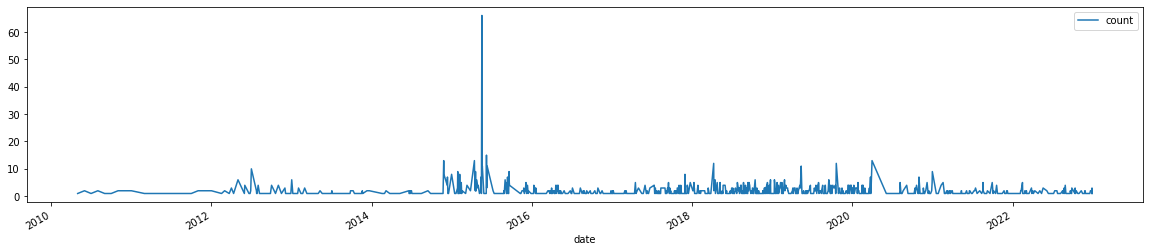

In [12]:
# dates of publishing youtube videos
publish_dates = pd.DataFrame(batch_1['youtube_publish_date'].value_counts(dropna=False).reset_index())
publish_dates.columns = ['date', 'count']
publish_dates.plot('date','count', figsize=(20,4))

In [13]:
#updated_at

assert batch_1['updated_at'].isna().sum() == 0
# check if the publish date is the same as the databse update date ?
if(batch_1['updated_at'].equals(batch_1['youtube_publish_date'])):
    batch_1.drop('updated_at', axis=1, inplace=True)
else:
    split_dates(batch_1, 'updated_at')
batch_1.columns

C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Index(['cc_name', 'mentor', 'description', 'issues', 'youtube_publish_date', 'updated_at', 'district', 'impact_possible', 'is_impact', 'impact_in_process', 'target_official', 'call_to_action', 'impact_plan', 'youtube_publish_date_year', 'youtube_publish_date_month', 'youtube_publish_date_day', 'updated_at_year', 'updated_at_month', 'updated_at_day'], dtype='object')

In [14]:
#issues

batch_1.loc[:,'issues'] = batch_1.loc[:,'issues'].str.strip().str.lower()
batch_1.loc[:, 'issues'].value_counts()

C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


anti poverty programs            466
crumbling infrastructure         199
governance and accountability    169
water                            166
education                        162
corruption                       131
health                           106
livelihoods                       92
sanitation                        62
power & energy                    56
forced evictions                  51
labor rights                      46
gender                            39
art & culture                     36
reproductive rights               29
environment                       29
infrastructure                    28
indigenous peoples                20
mining                            14
trafficking & migration           14
rural innovation                  13
development                       13
conflicts                         12
agrarian crisis                   11
religion & faith                  11
impact                             7
natural disaster                   6
t

In [15]:
# is_impact

batch_1.loc[:,'is_impact'] = batch_1.loc[:,'is_impact'].map({1.0:True, 0.0:False, None: 'NA'})
batch_1['is_impact'].value_counts(dropna=False)

False    1425
True      403
NaN       174
Name: is_impact, dtype: int64

In [16]:
# impact_possible

# batch_1.loc[:,'impact_possible'].value_counts(dropna=False)

batch_1.loc[:,'impact_possible'] = batch_1.loc[:,'impact_possible'].str.strip().str.lower()
batch_1.loc[:,'impact_possible'] = batch_1.loc[:,'impact_possible'].map({'no':False,'yes':True})  
batch_1.loc[:,'impact_possible'].value_counts(dropna=False)

True     1699
NaN       214
False      89
Name: impact_possible, dtype: int64

In [17]:
#impact_in_process

batch_1['impact_in_process'] = batch_1['impact_in_process'].str.lower().str.strip()
batch_1.loc[:, 'impact_in_process']= batch_1.loc[:,'impact_in_process'].map({'no' : False, 'yes' :True, 'na':'NA'})
batch_1.loc[:,'impact_in_process'].value_counts()

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


False    1662
True      309
NA         31
Name: impact_in_process, dtype: int64

In [18]:
#call to action
temp_cta = pd.DataFrame(duplicate['call_to_action'])
temp_cta.loc[:,'call_to_action'] = temp_cta.loc[:,'call_to_action'].str.strip().str.lower()

temp_cta['cta_present'] = temp_cta['call_to_action'].apply(lambda x: True if ((len(x) > 4) or x == 'yes') 
                                                                       else( 'NA' if x == 'na' else False))

# create an extra column that just says description.
temp_cta['cta_description'] = temp_cta['call_to_action'].apply(lambda x: x if len(x)>5 else 'NA')
temp_cta

# merge them to the final batch
batch_1.loc[:,'cta_present'] = temp_cta.loc[:,'cta_present']
batch_1.loc[:,'cta_description'] = temp_cta.loc[:, 'cta_description']

#remove the original column
batch_1 = batch_1.drop(columns = ['call_to_action'])

In [19]:
# target_official 

temp = batch_1.copy()
temp['target_official'] = temp['target_official'].str.strip()
# many inputs
temp['designation'] = temp['target_official'].str.split(",", expand = True)[0]
# removing the dots
temp['designation']= temp['designation'].str.replace('.', '')
# for uniformity
temp['designation'] = temp['designation'].str.upper()

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [20]:
# observed problems
observations = {'AND' : '', '&' : '', '-' : ',', ' OF ':'','CDOP':'CDPO',  'NOW':'NA', ' OF ': '', 'N':'NA', 'NO':'NA', 'NAA':'NA', 'N/A':'NA'}
temp['designation'] = temp['designation'].replace(observations)

In [21]:
# observed_titles
titles = ['BDO','BEO', 'BSO','CO','MOC', "CDPO", "DC", "SDO", "DFO", "SP", "EDU", "DEO", "PHD",  'ENGINEER', "BEEO", "DSP", 
          'CEO', 'DWSO', 'DSO', 'DO', 'DPO','CS', 'DTO', 'NHAI','DM',"DP"]

In [22]:
# check for the title substring in the column
temp['designation_clean'] =  temp['designation'].apply(lambda x : check_designation(x,titles))

In [23]:
# looking for rows where NA in designation_clean is due to the non NA values in designation

for i, row in temp.loc[(temp['designation']!='NA') & (temp['designation_clean'] == 'NA')].iterrows():
    try:
        temp.at[i, 'designation_clean'] = combined_title(row['designation'])
    except Exception as e:
        print(f"Error processing row {i}: {e} due to {temp.loc[i,'designation']}")

In [24]:
# find all the values that do not have the title in them
temp.loc[(~temp['designation_clean'].str.contains('|'.join(title for title in titles))), ['designation','designation_clean']].value_counts()

designation                                                                   designation_clean
NA                                                                            NA                   814
CHIEF                                                                         C                      6
DRINKING WATER AND SANITATION OFFICER                                         DWASO                  4
AMIT BHAGAT                                                                   AB                     4
HARIVANSH PANDIT                                                              HP                     3
MUKESH KUMAR                                                                  MK                     3
PANCHAYAT PRADHAN                                                             PP                     2
HARIWANSH PANDIT                                                              HP                     2
BANK MANAGER                                                                  BM

In [25]:
# fix the titles where the substring has any of the identified titles
temp['designation_clean'] = temp['designation_clean'].apply(lambda x : check_cs(x,titles))

In [26]:
# Final cleaning
final_changes = {'C' : 'NA', 'DWASO':'DWSO', 'DWSD':'DWSO'}
temp['designation_clean'] = temp['designation_clean'].replace(final_changes)

In [27]:
#upadting the final column in batch
batch_1.loc[:,'target_official'] = temp.loc[:,'designation_clean']

In [28]:
# DISTRICT

batch_1.loc[:,'district'] = batch_1.loc[:,'district'].str.strip().str.capitalize()
batch_1.loc[:,'district'] = batch_1.loc[:,'district'].replace('Na', 'NA')

batch_1['district'] = batch_1['district'].str.upper()

replace ={
    'Chhatra' : 'Chatra',
    'Devghar' : 'Deoghar', 'Deogarh' : 'Deoghar',
    'Gonda' : 'Godda',
    'Hazaribag' : 'Hazaribagh',
    'Koderma' : 'Kodarma',
    'Paakur':'Pakur',
    'Sahebganj' : 'Sahiganj',
    'Saraikela' : 'Saraikella Kharsawan', 'Saraikela-Kharsawan' : 'Saraikella Kharsawan','Saraikella kharsawan' : 'Saraikella Kharsawan',
    'West Singhbhum' : 'Pashchimi Singhbhum','West singhbhum' : 'Pashchimi Singhbhum',
    'East Singhbhum' : 'Purbi Singhbhum',
     'East singhbhum' : 'Purbi Singhbhum'
}

In [29]:
removed_districts = ['NA', 'DANTEWADA']
batch_district_ready = batch_1.copy()

# remove rows that have dsirict DANTEWADA
batch_district_ready = batch_district_ready[~batch_district_ready['district'].str.contains('|'.join(district for district in removed_districts))]

# combine khunti and ranchi ; ramgardh and haziarbagh
batch_district_ready['district'] = batch_district_ready['district'].replace( {'KHUNTI' : 'RANCHI','RAMGARH' : 'HAZARIBAGH'} ) 
batch_district_ready['district'].value_counts()


RANCHI                  229
CHHATRA                 218
DUMKA                   199
HAZARIBAGH              196
BOKARO                  158
SAHEBGANJ               117
WEST SINGHBHUM          112
KODERMA                  95
GUMLA                    77
GIRIDIH                  73
DHANBAD                  72
PAAKUR                   59
GONDA                    52
JAMTARA                  51
EAST SINGHBHUM           48
PALAMU                   46
SIMDEGA                  44
SARAIKELLA KHARSAWAN     36
DEOGHAR                  35
DEOGARH                  34
LATEHAR                  22
LOHARDAGA                15
GARHWA                   10
Name: district, dtype: int64

In [30]:
# storing for cross notebook usage
districts_form = batch_district_ready['district'].copy()
districts_form.unique()
%store districts_form

Stored 'districts_form' (Series)


In [31]:
list(batch_1.columns)

['cc_name',
 'mentor',
 'description',
 'issues',
 'youtube_publish_date',
 'updated_at',
 'district',
 'impact_possible',
 'is_impact',
 'impact_in_process',
 'target_official',
 'impact_plan',
 'youtube_publish_date_year',
 'youtube_publish_date_month',
 'youtube_publish_date_day',
 'updated_at_year',
 'updated_at_month',
 'updated_at_day',
 'cta_present',
 'cta_description']

In [32]:
batch_1.to_csv('batch_1.csv', index=False)